In [62]:
# Plot the forecast verification against reanalysis data (for ERA5 only):
# Plot normalized regional 'drmse' timeseries at selected levels for selected variables
# compare multiple experiments
# initial built: 2025/03/20

# transformed to py: 2025/04/28
# /scratch2/GFDL/gfdlscr/Chih-Chi.Hu/forecast_verification_ERA5/plot_forecast_timeseries_multiexp_temp.py

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import netCDF4 as nc


In [37]:
datahome  = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/forecast_verification_ERA5/data/'
#timerange = '2022062300_2022080200_24'
timerange = '2022062300_2022080200_24_cutoff_1000'

expref  = 'FC_full_CTRL'
#exptest = ['FC_full_clr_cld','FC_full_clr_cld_sym_tri','FC_full_clr_cld_low_sym_tri']
exptest = ['FC_full_clr_cld_sym_bc', 'FC_full_clr_cld_sym', 'FC_full_clr_cld_sym_tri']
expstr = '-'.join(exptest)

#dirname   = 'FC_full_clr_cld-FC_full_clr_cld_low_sym_tri'
#dirname   = 'FC_full_CTRL-FC_full_clr_cld_low_sym_tri'
#dirname   = 'FC_full_CTRL-FC_full_clr_cld_sym_tri'
#dirname   = 'FC_full_CTRL-FC_full_only_clr'
#dirname   = 'FC_full_CTRL-FC_full_clr_cld'
#dirname   = 'FC_full_CTRL-FC_full_clr_cld_low'
#dirname   = 'FC_full_CTRL-FC_full_CTRL_noinf'
#dirname   = 'FC_ctrl-FC_ctrl_noinf'

#regions = ['', '_ocean'] # '_land', '_ocean', '' (global)
regions = ['']
avg_rgs = ['global','TR','NH','SH'] 
fcsthrs   = ['00','24','48','72','96','120','144','168','192']

save_fig = True
fig_root = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/python_codes/figures/forecast_verification_ERA5/timeseries_multiexp'
fig_dir = f'{fig_root}/{expstr}/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


Directory '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/python_codes/figures/forecast_verification_ERA5/timeseries_multiexp/FC_full_clr_cld_sym_bc-FC_full_clr_cld_sym-FC_full_clr_cld_sym_tri/' created.


In [7]:
explabel={'FC_full_CTRL':       'CTRL',
          'FC_full_CTRL_noinf': 'NOINF',
          'FC_full_only_clr':   'CLR',
          'FC_full_clr_cld':    'CLR-CLD',
          #'FC_full_clr_cld_sym_tri': 'CLR-CLD_SYM',
          'FC_full_clr_cld_sym_tri': 'TENT_NOBC',
          'FC_full_clr_cld_sym_bc':  'POLY_BC',
          'FC_full_clr_cld_sym':     'POLY_NOBC',
          'FC_full_clr_cld_low_sym_tri': 'CLR-CLD_SYM_LOW', 
          'FC_full_CTRL_low_sym':        'CTRL_SYM_LOW'}

expcolor = {'FC_full_CTRL': 'black', 
            'FC_full_only_clr': 'gray', 
            'FC_full_clr_cld' : 'blue', 
            'FC_full_clr_cld_sym_tri' :     'green', 
            'FC_full_clr_cld_low_sym_tri':  'orange', 
            'FC_full_CTRL_low_sym': 'olive', 
            'FC_full_clr_cld_sym_bc':       'brown',
            'FC_full_clr_cld_sym':    'purple'  }

In [10]:
# read netcdfs:
variables = ["dqg_norm", "dtg_norm", "dug_norm", "dclwg_norm",
             "d95_q_region", "d95_t_region", "d95_u_region", "d95_clw_region"]

data = {var: {} for var in variables}


for exp in exptest:
    
    print(f'processing {exp}...')
    
    # initialize
    for var in variables:
        data[var][exp] = {}

    for rg in regions:
        
        # initialize
        for var in variables:
            data[var][exp][rg] = {}
        
        for avg_rg in avg_rgs:
            
            # initialize
            for var in variables:
                data[var][exp][rg][avg_rg] = {}
                    
            dqg_norm = data["dqg_norm"]
            dtg_norm = data["dtg_norm"]
            dug_norm = data["dug_norm"]
            dclwg_norm = data["dclwg_norm"]
            d95_q_region = data["d95_q_region"]
            d95_t_region = data["d95_t_region"]
            d95_u_region = data["d95_u_region"]
            d95_clw_region = data["d95_clw_region"]
            
            for tt in fcsthrs:

                dirname=f'{expref}-{exp}'
                ncdir = os.path.join(datahome, dirname, timerange)
                f = nc.Dataset(f"{ncdir}/d{avg_rg}mean_rmse{rg}_{exp}_f{tt}.nc")
                
                if 'lev' not in locals():
                    lev = f.variables['level'][:]

                dqg_norm[exp][rg][avg_rg][tt] = f.variables['q'][:]
                dtg_norm[exp][rg][avg_rg][tt] = f.variables['t'][:]
                dug_norm[exp][rg][avg_rg][tt] = f.variables['u'][:]
                dclwg_norm[exp][rg][avg_rg][tt] = f.variables['clwmr'][:]

                d95 = nc.Dataset(f"{ncdir}/d95_{avg_rg}{rg}_{exp}_f{tt}.nc")
                d95_q_region[exp][rg][avg_rg][tt] = d95.variables['q'][:]
                d95_t_region[exp][rg][avg_rg][tt] = d95.variables['t'][:]
                d95_u_region[exp][rg][avg_rg][tt] = d95.variables['u'][:]    
                d95_clw_region[exp][rg][avg_rg][tt] = d95.variables['clwmr'][:]  


processing FC_full_clr_cld_sym_bc...
processing FC_full_clr_cld_sym...
processing FC_full_clr_cld_sym_tri...


In [53]:
lev

masked_array(data=[  10,   20,   50,  100,  150,  200,  250,  300,  350,
                    400,  450,  500,  550,  600,  650,  700,  750,  800,
                    850,  900,  925,  950,  975, 1000],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [59]:
# Select plot rgs, avg_regions, levels:
plt_regions = ['']                     # only ocean or not ['']
plt_avg_rgs = ['global','NH','SH','TR']               # global, SH, NH, TR
#plt_zs  = [1000, 975, 950, 925, 900, 850, 800, 750, 700, 650, 600, 500, 400, 300, 250, 200, 100, 50, 20, 10]    # assigned levels:
plt_zs  = [1000, 975]    # assigned levels:

plt_vars = ['T','Q','U']                          # T, Q, U

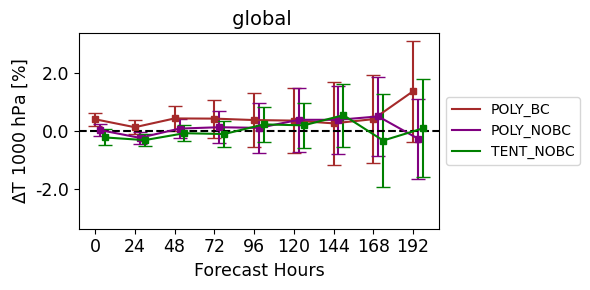

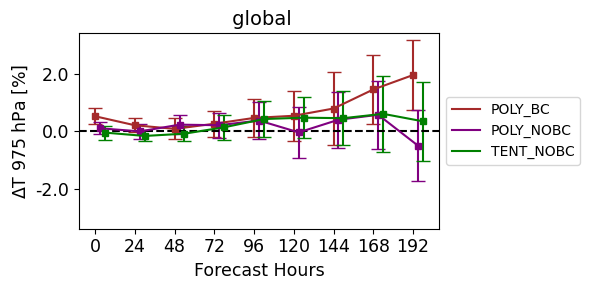

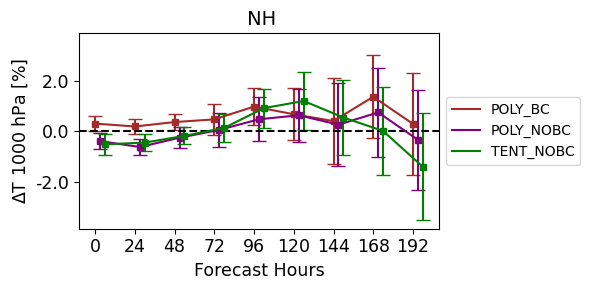

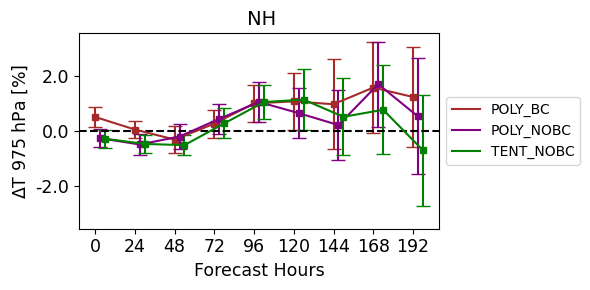

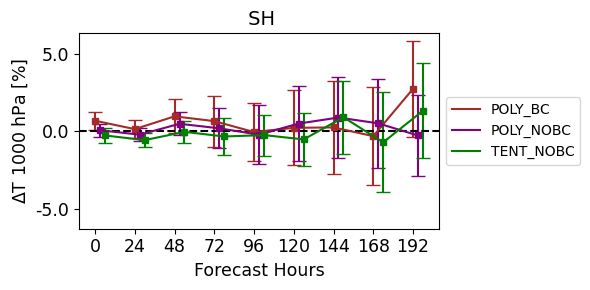

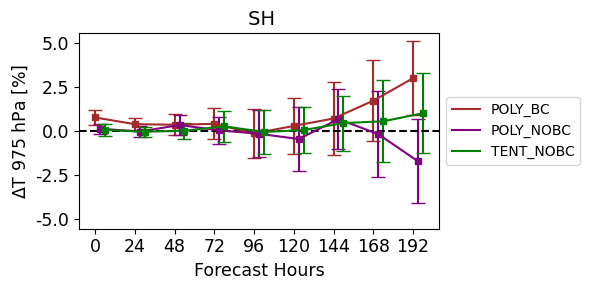

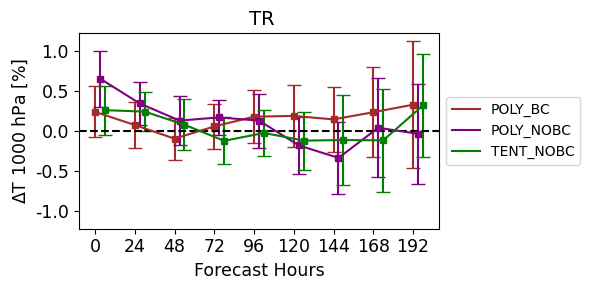

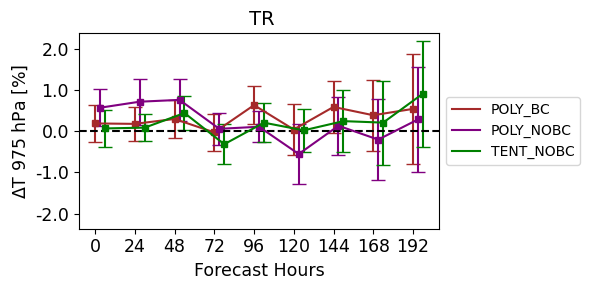

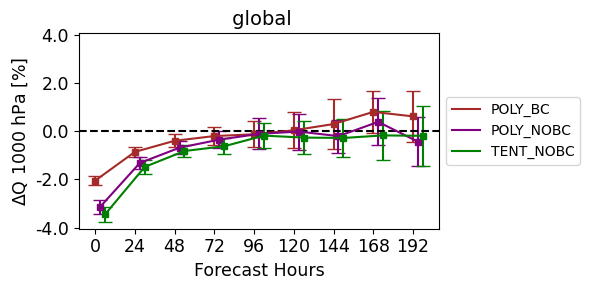

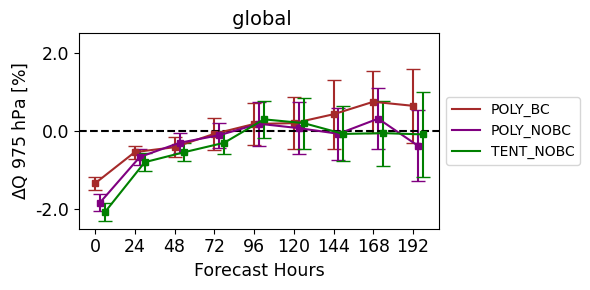

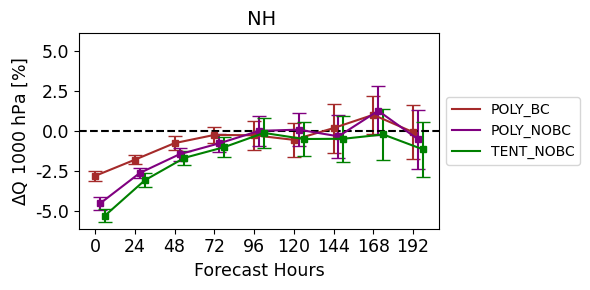

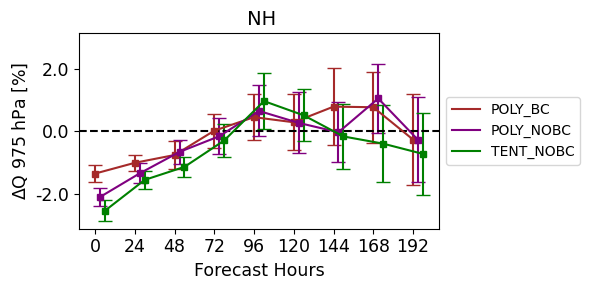

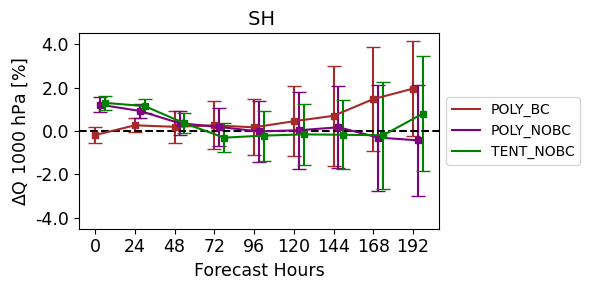

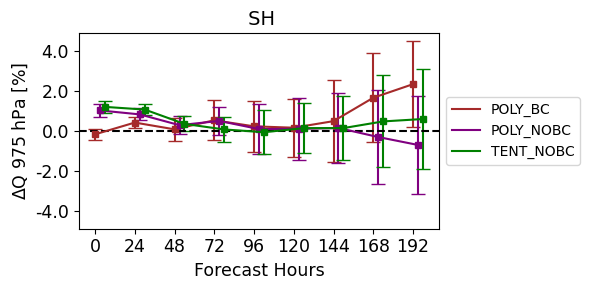

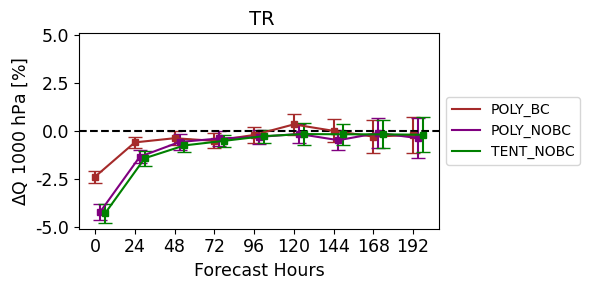

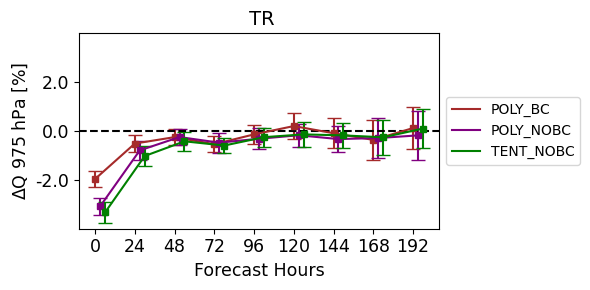

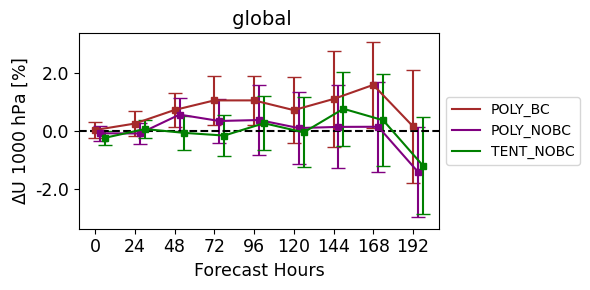

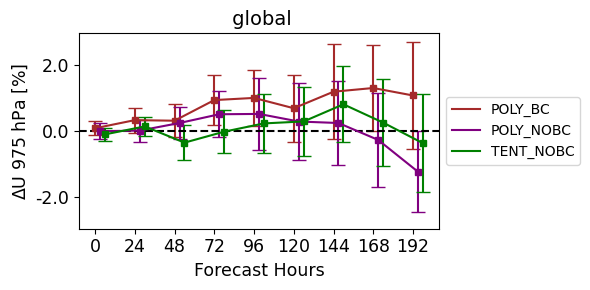

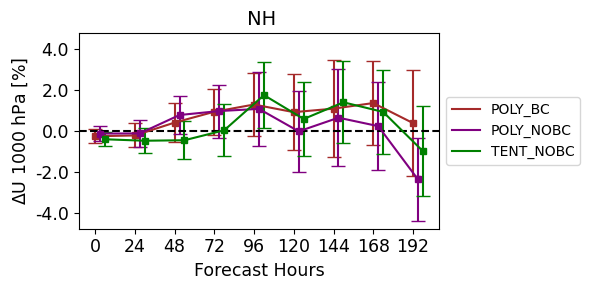

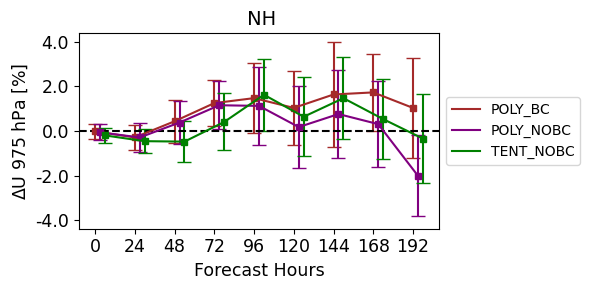

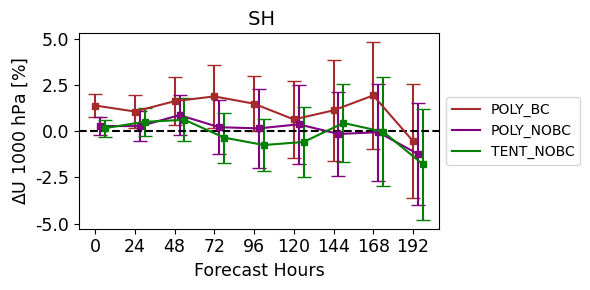

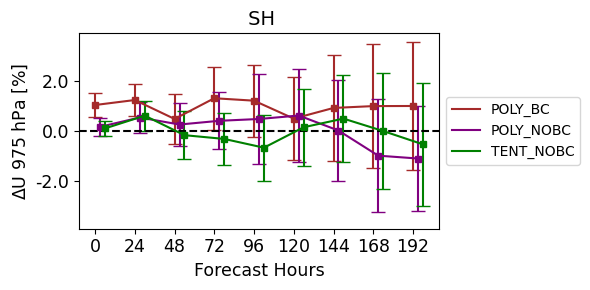

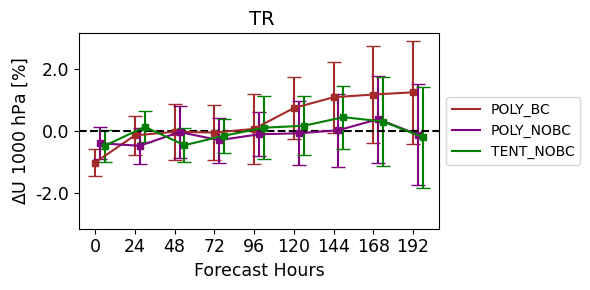

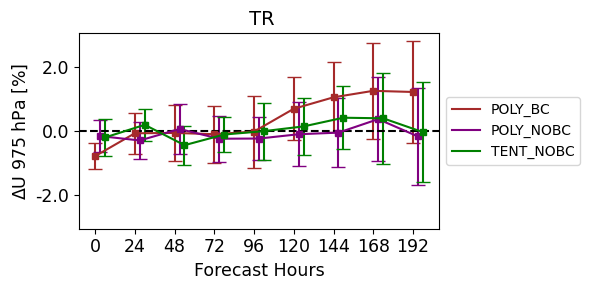

In [65]:

for plt_var in plt_vars:
    for plt_region in plt_regions:
        for plt_avg_rg in plt_avg_rgs:
            for plt_z in plt_zs:

                sel_z = np.where(lev == plt_z)[0][0]
                plt_var_name = rf'$\Delta${plt_var} {plt_z} hPa'

                dnorm = {};
                cibar = {};

                for exp in exptest:
                    dnorm[exp] = np.zeros(len(fcsthrs))
                    cibar[exp] = np.zeros(len(fcsthrs))

                    for t,tt in enumerate(fcsthrs):

                        if plt_var == 'Q':
                            dnorm[exp][t] = dqg_norm[exp][plt_region][plt_avg_rg][tt][sel_z]*100
                            cibar[exp][t] = d95_q_region[exp][plt_region][plt_avg_rg][tt][sel_z]*100
                        elif plt_var == 'T':
                            dnorm[exp][t] = dtg_norm[exp][plt_region][plt_avg_rg][tt][sel_z]*100
                            cibar[exp][t] = d95_t_region[exp][plt_region][plt_avg_rg][tt][sel_z]*100
                        elif plt_var == 'U':
                            dnorm[exp][t] = dug_norm[exp][plt_region][plt_avg_rg][tt][sel_z]*100
                            cibar[exp][t] = d95_u_region[exp][plt_region][plt_avg_rg][tt][sel_z]*100


                # Plot Sections:

                fig, ax = plt.subplots(figsize=(6,3))

                for e, exp in enumerate(exptest):
                    x_axis = [int(x)+3*e for x in fcsthrs]
                    y_axis = dnorm[exp][:]
                    ci_bar = cibar[exp][:]

                    ax.errorbar(x_axis, y_axis, color=expcolor[exp], label=f'{explabel[exp]}')
                    ax.errorbar(x_axis, y_axis, yerr=ci_bar, fmt='s', color=expcolor[exp], ecolor=expcolor[exp], capsize=5, linestyle='None', markersize=4)
                ax.set_xticks([int(x) for x in fcsthrs])
                ymin, ymax = plt.ylim()
                ymax_abs = max(abs(ymin), abs(ymax))
                ax.set_ylim(-ymax_abs, ymax_abs)
                ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                #ax.set_ylim(-2.5,2.5)
                ax.tick_params(axis='both', labelsize=12.5)
                ax.set_xlabel('Forecast Hours', fontsize=12.5)
                ax.set_ylabel(f'{plt_var_name} [%]', fontsize=12.5)
                ax.axhline(0, linestyle='--', color='black')

                ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

                ax.set_title(f'{plt_region} {plt_avg_rg}', fontsize=14)
                plt.tight_layout()

                if save_fig:
                    plt.savefig(f"{fig_dir}/{plt_var}_{plt_avg_rg}_{plt_z}hPa.png", dpi=300, bbox_inches='tight')
                plt.show()